## Model Forecasting

In [6]:
# !pip install yfinance
# !pip install pmdarima

#### Mounted at /content/drive

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys,os
import pandas as pd
sys.path.append('/content/drive/MyDrive/my_project')

In [8]:
from forecast import MarketForecaster
from model_builder import TimeSeriesForecaster

In [9]:
data = pd.read_csv('/content/drive/MyDrive/my_project/TSLA_data.csv', parse_dates=True)
data=data.dropna()
data.set_index('Date', inplace=True)

## Forecast LSTM model for the next 180 days

Data split: 2872 train, 718 test
Training LSTM model


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - loss: 0.0318 - val_loss: 0.0040
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0026 - val_loss: 0.0045
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0023 - val_loss: 0.0054
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0023 - val_loss: 0.0052
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0019 - val_loss: 0.0055
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0

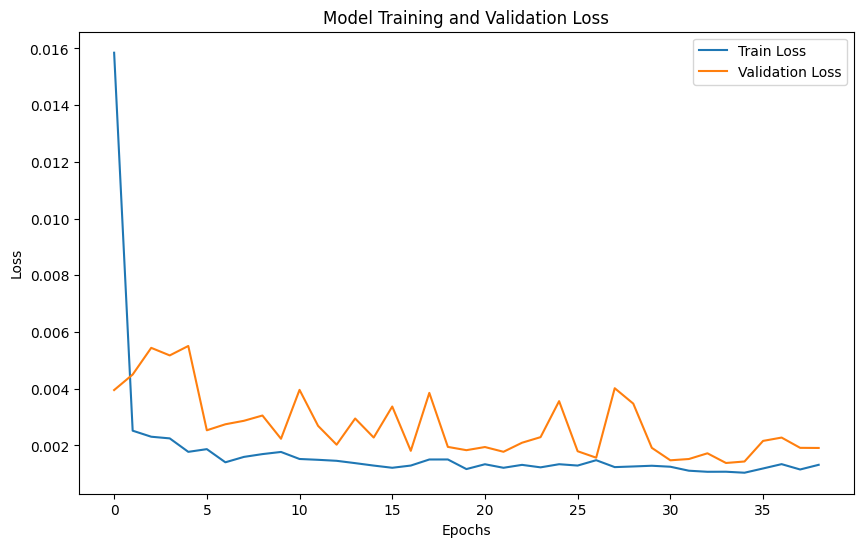

In [10]:
# Sample usage:
# Assuming the forecaster object (trained TimeSeriesForecaster) is available
forecaster = TimeSeriesForecaster(data, column='Close')
forecaster.prepare_data()
forecaster.train_lstm()  # or forecaster.train_sarima() or forecaster.train_lstm()

In [11]:
market_forecaster = MarketForecaster(forecaster, model_name='LSTM', forecast_periods=180)

In [12]:
forecast = market_forecaster.generate_forecast()

Generating forecast for 180 days using LSTM model.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/ste

## LSTM model Forecast for Tesla's stock Price

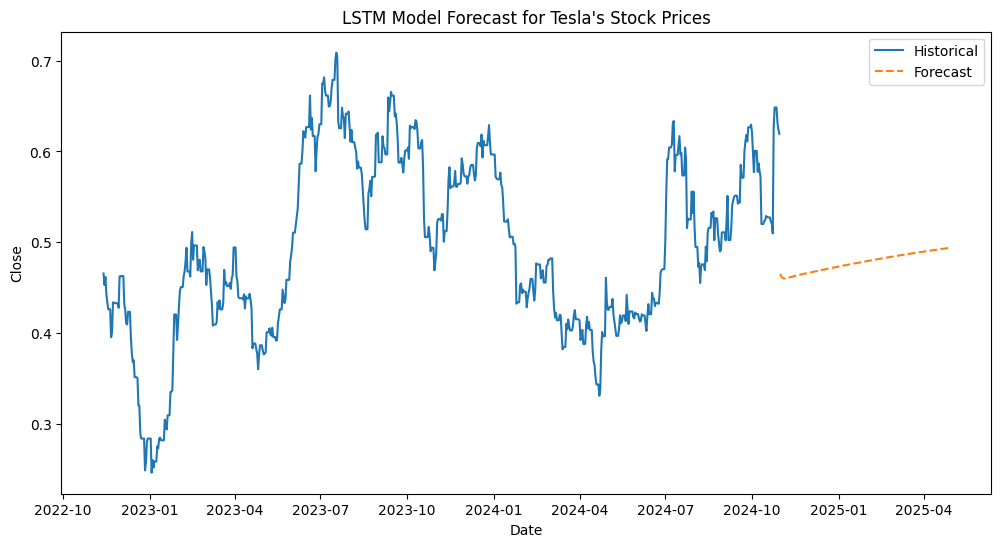

In [13]:
market_forecaster.plot_forecast(forecast)

### LSTM Model Forecast for Tesla's Stock Prices

The LSTM model forecasts a slight upward trend for Tesla's stock prices.

**Key Points**:

- **Upward Trend**: The model predicts a gradual increase in the stock price.
- **Moderately Confident**: The forecast line is relatively stable, suggesting moderate confidence in the prediction.

### Analysis forecast

In [14]:
market_forecaster.analyze_forecast(forecast)

Forecasted Trend: upward
Forecasted Volatility (Standard Deviation): 0.0099

Analysis Summary:
- Long-term Trend: Upward
- Expected Volatility: Low
- Market Opportunities: Potential buy/sell opportunities based on trend and volatility.
- Risks: Consider risks if volatility is high or trend is downward.


## Forecast ARIMA

In [17]:
forecaster.train_arima()

Training ARIMA model
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17553.051, Time=1.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17557.925, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17559.421, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17559.423, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17559.372, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17557.423, Time=1.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17557.423, Time=0.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17555.422, Time=0.99 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17560.828, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-17558.829, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-17558.829, Time=0.67 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-17560.828, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-17556.870, Time=2.38 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total

In [18]:
market_forecaster1 = MarketForecaster(forecaster, model_name='ARIMA', forecast_periods=180)

In [19]:
forecast1 = market_forecaster1.generate_forecast()

Generating forecast for 180 days using ARIMA model.


### Plot ARIMA model Forecast for Tesla stock price

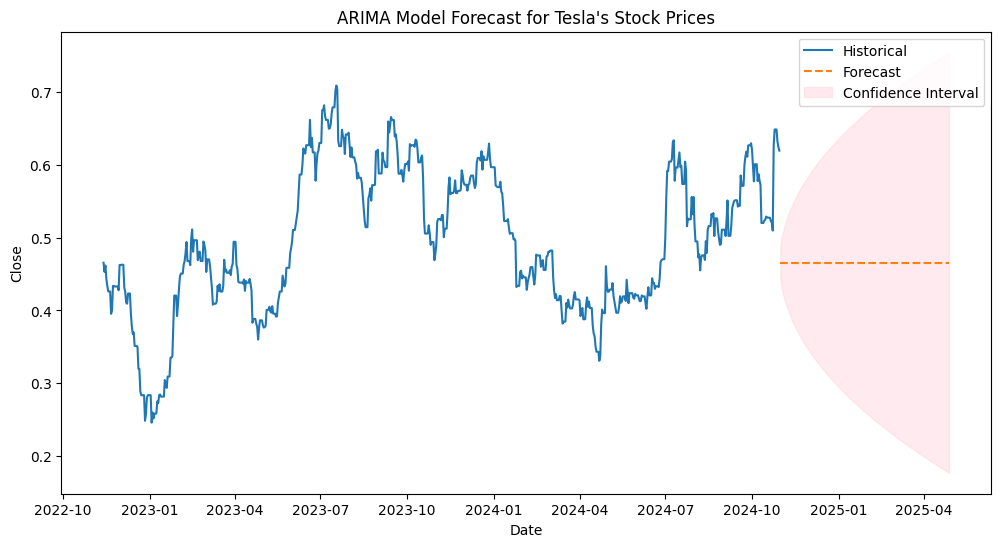

In [20]:
market_forecaster1.plot_forecast(forecast1)

### ARIMA Model Forecast for Tesla's Stock Prices

The ARIMA model forecasts a flat trend for Tesla's stock prices. However, the wide confidence interval indicates significant uncertainty in this prediction.

**Key Points**:

- **Flat Trend**: The model predicts a stable price.
- **Wide Confidence Interval**: The model is uncertain about the accuracy of its prediction.

## Analysis forecast for ARIMA model

In [21]:
market_forecaster1.analyze_forecast(forecast1)

Forecasted Trend: stable
Forecasted Volatility (Standard Deviation): 0.0000

Analysis Summary:
- Long-term Trend: Stable
- Expected Volatility: Low
- Market Opportunities: Potential buy/sell opportunities based on trend and volatility.
- Risks: Consider risks if volatility is high or trend is downward.


/content/drive/MyDrive/my_project/forecast.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend = "upward" if forecast[-1] > forecast[0] else "downward" if forecast[-1] < forecast[0] else "stable"


### End